Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize

In [2]:
airlines = pd.read_csv('E:/data science/Assignments_Data_science/Clustering/EastWestAirlines.csv')
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# EDA

In [4]:
# Renaming the 'Award?' column as 'Award'
airlines1 = airlines.rename({'ID#' : 'ID', 'Award?': 'Award'}, axis =1)
airlines1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
#Removing unwanted column ID#
airlines2 = airlines1.drop(['ID'], axis=1)
airlines2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
airlines2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [8]:
airlines2.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award                int64
dtype: object

In [9]:
airlines2.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [10]:
airlines2.isna().sum() #checking for missing values

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

# Agglomerative Clustering

In [11]:
#Normalization of the dataset
scaler1 = StandardScaler()
scaler1_df = scaler1.fit_transform(airlines2)
print(scaler1_df)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


In [12]:
#Normalization of the dataset
scaler2 = MinMaxScaler()
scaler2_df = scaler2.fit_transform(airlines2)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


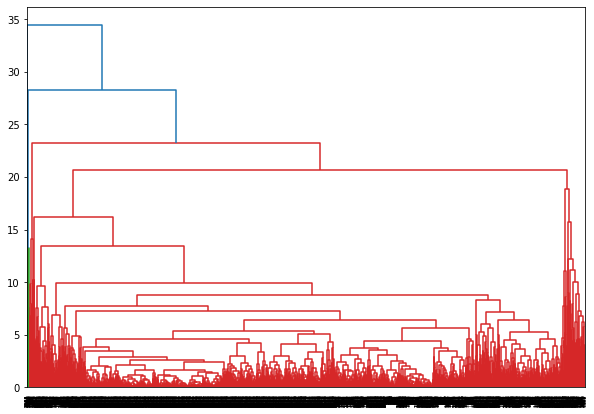

In [13]:
#plotting Dendrogram 
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler1_df,'complete'))

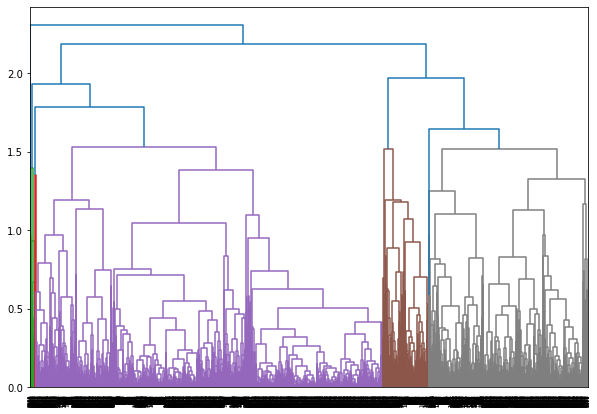

In [14]:
#plotting Dendrogram
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler2_df,'complete'))

In [40]:
# creating clusters
H_clusters = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [41]:
y=pd.DataFrame(H_clusters.fit_predict(scaler1_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    2446
0    1362
2     130
3      43
4      18
Name: clustersid, dtype: int64

In [51]:

# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. standardScaler
airlines1['clustersid_s1']=H_clusters.labels_
airlines1

airlines2['clustersid_s1']=H_clusters.labels_

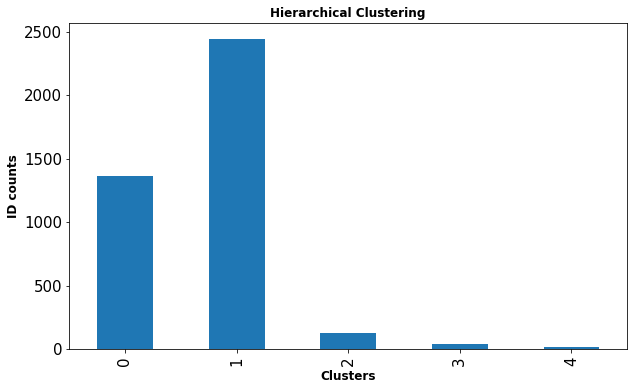

In [53]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
airlines1.groupby(['clustersid_s1']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [55]:
airlines1.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1706.626285,116134.226872,367.779736,3.500000,1.000000,1.000000,36501.331865,17.958884,376.402349,1.147577,4699.638767,0.665198
1,1,2197.204007,46329.336877,9.028618,1.244072,1.000000,1.000000,4868.112428,6.907604,214.812756,0.673753,3769.337694,0.184383
2,2,1765.615385,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846
3,3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,4,1742.444444,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000


In [56]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [58]:
sil_score= silhouette_score(scaler1_df, H_clusters.labels_)
sil_score

0.30988053078744143

In [59]:
# Using data normalized by StandardScaler
y=pd.DataFrame(H_clusters.fit_predict(scaler2_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [60]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. MinMaxscaler
airlines1['clustersid_s2']=H_clusters.labels_
airlines1['clustersid_s2']=H_clusters.labels_

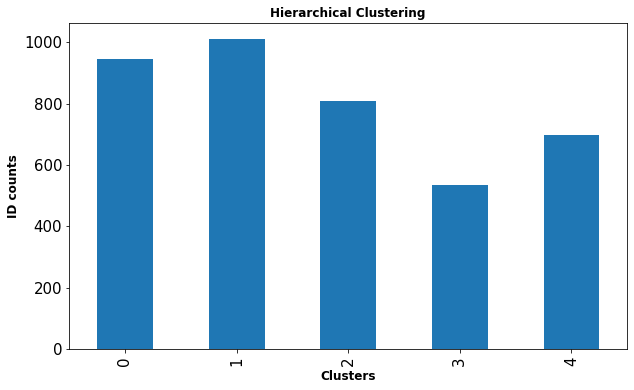

In [61]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
airlines1.groupby(['clustersid_s2']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [63]:
airlines1.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1706.626285,116134.226872,367.779736,3.500000,1.000000,1.000000,36501.331865,17.958884,376.402349,1.147577,4699.638767,0.665198,1.729075
1,1,2197.204007,46329.336877,9.028618,1.244072,1.000000,1.000000,4868.112428,6.907604,214.812756,0.673753,3769.337694,0.184383,1.773099
2,2,1765.615385,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846,2.038462
3,3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,0.627907
4,4,1742.444444,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000,2.444444


In [64]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

sil_score= silhouette_score(scaler2_df, H_clusters.labels_)
sil_score

0.3762586351398372

# KMeans Clustering

In [68]:
# Normalize heterogenous numerical data
airline2_norm=pd.DataFrame(normalize(airlines2),columns=airlines2.columns)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0.000034
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0.000049
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0.000024
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0.000061
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,0.000000
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,0.000018


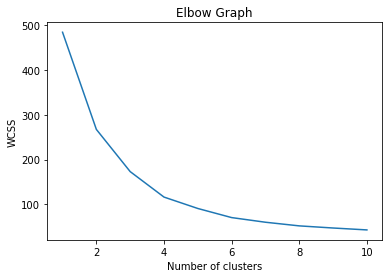

In [69]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(airline2_norm)
    wcss.append(kmeans.inertia_)
    # Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Build Cluster algorithm using K=4

In [70]:
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=30).fit(airline2_norm)
clusters4

KMeans(n_clusters=4, random_state=30)

In [71]:
clusters4.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [72]:
# Assign clusters to the data set
airlines4=airlines2.copy()
airlines4['clusters4id']=clusters4.labels_
airlines4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clusters4id
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [73]:
# Compute the centroids for K=4 clusters with 11 variables
clusters4.cluster_centers_

array([[9.82878895e-01, 3.71612339e-03, 4.15057178e-05, 3.77179164e-05,
        3.76205547e-05, 8.06914053e-02, 1.57453087e-04, 6.65079626e-03,
        2.12921781e-05, 1.03324884e-01, 4.81770303e-06, 3.61656052e-05],
       [5.23653974e-01, 2.37603195e-03, 9.13653025e-05, 4.56081223e-05,
        4.45095200e-05, 7.97866696e-01, 5.07019467e-04, 1.75075995e-02,
        5.89123088e-05, 1.31443993e-01, 3.00837173e-05, 2.97580728e-05],
       [6.28081299e-01, 9.30359260e-04, 2.06331580e-04, 2.06128729e-04,
        2.05879913e-04, 1.23980620e-01, 4.76413688e-04, 6.66146522e-03,
        2.24385610e-05, 6.89106581e-01, 2.58980757e-05, 2.04217298e-04],
       [8.99048677e-01, 2.03403471e-03, 5.68074073e-05, 3.01913196e-05,
        2.95156434e-05, 4.03089038e-01, 4.02398111e-04, 7.62262674e-03,
        2.24052643e-05, 8.50654939e-02, 9.73901646e-06, 2.18656904e-05]])

In [75]:
# Group data by Clusters (K=4)
airlines4.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,88484.857577,175.062961,1.495441,1.008250,1.001737,8110.131568,8.770734,476.973079,1.439427,4060.013895,0.255319,0.860182
1,1,28617.579670,112.000000,3.280220,1.030220,1.068681,42166.565934,17.634615,659.725275,1.909341,4229.689560,0.901099,0.445055
2,2,5129.247934,8.285124,1.004132,1.004132,1.000000,891.388430,3.012397,66.466942,0.194215,4843.239669,0.185950,0.995868
3,3,72378.903670,119.606422,3.077982,1.024771,1.018349,31486.477982,17.476147,445.017431,1.317431,4044.253211,0.477064,0.479817


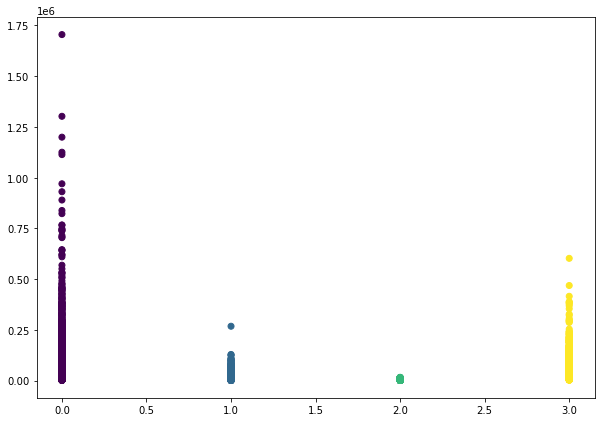

In [77]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airlines4['clusters4id'],airlines4['Balance'], c=clusters4.labels_)

# Build Cluster algorithm using K=5

In [78]:
# Cluster algorithm using K=5
clusters5=KMeans(5,random_state=30).fit(airline2_norm)
clusters5

KMeans(n_clusters=5, random_state=30)

In [79]:
clusters5.labels_

array([0, 3, 0, ..., 4, 0, 3])

In [81]:
# Assign clusters to the data set
airlines5=airlines2.copy()
airlines5['clusters5id']=clusters5.labels_
airlines5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clusters5id
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,4
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [82]:
# Compute the centroids for K=5 clusters with 11 variables
clusters5.cluster_centers_

array([[ 9.87581991e-01,  3.39051828e-03,  3.51053889e-05,
         3.03791211e-05,  3.02652007e-05,  9.01709732e-02,
         1.53701634e-04,  6.66013521e-03,  2.09767345e-05,
         7.53291180e-02,  3.94536689e-06,  2.87599845e-05],
       [ 5.14758995e-01,  2.45703304e-03,  9.55752927e-05,
         5.00781616e-05,  4.87710459e-05,  8.02358701e-01,
         5.20472056e-04,  1.80244810e-02,  6.06430610e-05,
         1.36539351e-01,  3.06234743e-05,  3.43032717e-05],
       [ 4.14644776e-01, -2.16840434e-18,  2.28611963e-04,
         2.27627249e-04,  2.27627249e-04,  1.50766677e-01,
         5.97513391e-04,  7.35401475e-03,  2.84888374e-05,
         8.48268351e-01,  3.91049395e-05,  2.25340413e-04],
       [ 8.93103615e-01,  4.45303855e-03,  1.23796962e-04,
         1.23612805e-04,  1.23612805e-04,  7.60122609e-02,
         2.95169034e-04,  6.30476780e-03,  2.07480657e-05,
         4.07515383e-01,  1.35161631e-05,  1.21342935e-04],
       [ 8.91833805e-01,  2.00098101e-03,  5.8055327

In [84]:
# Group data by Clusters (K=5)
airlines5.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,97404.121382,185.499533,1.604575,1.009337,1.001867,9636.360411,9.704015,520.399627,1.565359,3960.816060,0.269374,0.834734
1,1,27526.798295,115.818182,3.247159,1.034091,1.071023,41812.809659,17.599432,676.107955,1.951705,4226.252841,0.903409,0.463068
2,2,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225,0.990991
3,3,11768.858247,55.121134,1.005155,1.000000,1.000000,984.778351,3.469072,93.216495,0.293814,4908.760309,0.172680,0.976804
4,4,70743.739563,116.122266,3.135189,1.025845,1.019881,32531.393638,17.626243,442.855865,1.312127,4045.261431,0.491054,0.464215


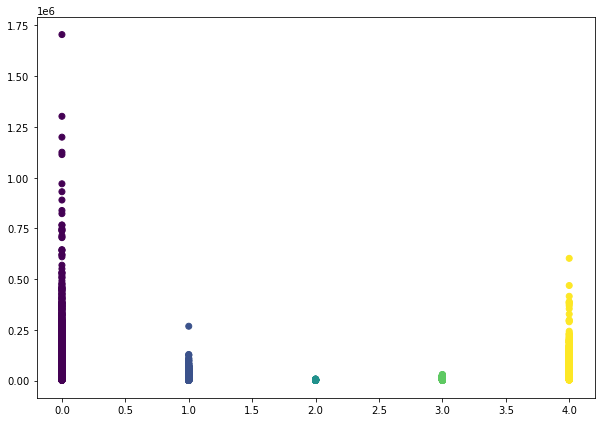

In [86]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airlines5['clusters5id'],airlines5['Balance'], c=clusters5.labels_)

# DBSCAN

In [130]:
# Normalizing data using MinMaxScaler
scaler3_df = scaler2.fit_transform(airlines2)
print(scaler3_df)

[[0.01650773 0.         0.         ... 0.84374246 0.         0.25      ]
 [0.01128788 0.         0.         ... 0.83988425 0.         0.25      ]
 [0.02425685 0.         0.         ... 0.84784181 0.         0.25      ]
 ...
 [0.0431695  0.         0.5        ... 0.16879672 1.         0.        ]
 [0.03220189 0.         0.         ... 0.16867615 0.         0.25      ]
 [0.00176908 0.         0.         ... 0.16831444 0.         0.25      ]]


We will try for different values of eps and mn_samples

In [131]:
# Using data normalized by MinMaxScaler
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(scaler3_df)

DBSCAN(eps=1, min_samples=12)

In [132]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [133]:
y=pd.DataFrame(dbscan.fit_predict(scaler3_df),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

0    2518
1    1481
Name: clusterid_DBSCAN, dtype: int64

In [134]:
# silhouette score
sil_score= silhouette_score(scaler3_df, dbscan.labels_)
sil_score

0.5220328042361407

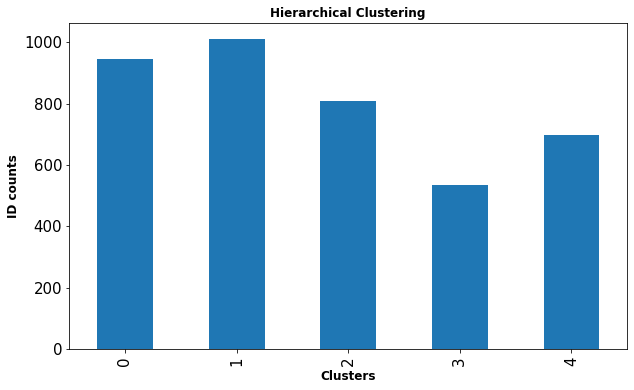

In [135]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
airlines1.groupby(['clustersid_s2']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [136]:
# for epsilon = 0.8
dbscan1 = DBSCAN(eps=0.8, min_samples=12)
dbscan1.fit(scaler3_df)

y=pd.DataFrame(dbscan1.fit_predict(scaler3_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler3_df, dbscan1.labels_)
print('silhouette score: ',sil_score)

 0    2514
 1    1481
-1       4
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.5202909987677702


In [137]:
# for epsilon = 0.6
dbscan2 = DBSCAN(eps=0.6, min_samples=12)
dbscan2.fit(scaler3_df)

y=pd.DataFrame(dbscan2.fit_predict(scaler3_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler3_df, dbscan2.labels_)
print('silhouette score: ',sil_score)

 0    2508
 1    1467
-1      24
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.5220591956233577


In [139]:
# for epsilon = 0.5
dbscan3 = DBSCAN(eps=0.5, min_samples=12)
dbscan3.fit(scaler3_df)

y=pd.DataFrame(dbscan3.fit_predict(scaler3_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler3_df, dbscan3.labels_)
print('silhouette score: ',sil_score)

 0    2480
 1    1448
-1      55
 2      16
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.41827830841458163


In [140]:
# for epsilon = 0.55
dbscan4 = DBSCAN(eps=0.55, min_samples=12)
dbscan4.fit(scaler3_df)

y=pd.DataFrame(dbscan4.fit_predict(scaler3_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler3_df, dbscan4.labels_)
print('silhouette score: ',sil_score)

 0    2483
 1    1451
-1      28
 2      25
 3      12
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.4415342723805568


-1 shows the noisy data points

In [142]:
airlines['clusterid_DBSCAN'] = dbscan4.labels_
airlines2['clusterid_DBSCAN'] = dbscan4.labels_

In [146]:
airlines2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clusterid_DBSCAN
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1


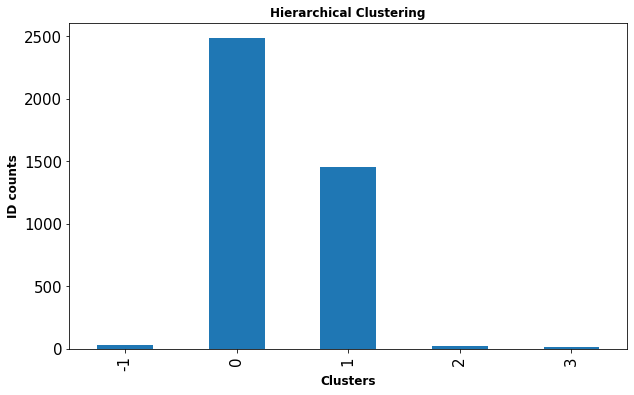

In [151]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
airlines.groupby(['clusterid_DBSCAN']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [154]:
airlines.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid_s1
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1830.428571,180114.571429,127.500000,2.821429,1.357143,2.75,75489.500000,29.821429,2778.642857,7.214286,4385.964286,0.642857,3.357143
1,0,2171.298429,59520.313331,88.837294,1.707209,1.000000,1.00,10014.214257,9.043496,226.844140,0.652437,3822.606927,0.000000,0.829239
2,1,1742.386630,96013.240524,242.702274,2.674018,1.000000,1.00,28354.393522,15.525155,817.018608,2.501723,4626.245348,1.000000,0.443143
3,2,2398.840000,43494.400000,0.000000,1.000000,2.360000,1.00,11483.320000,13.800000,150.000000,0.600000,3544.400000,0.000000,3.000000
4,3,2208.583333,91415.916667,0.000000,1.083333,2.166667,1.00,12827.666667,19.500000,788.583333,2.166667,4540.583333,1.000000,3.000000
